In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import itertools
import torch
import torch.nn as nn
import torch.utils.data as utils_data
from torchvision import datasets, transforms
from PIL import Image

In [2]:
choice = np.random.permutation([i for i in range(1,68)])
choice = sorted (choice[0:25])
choice = list(range(1,25+1))
print('choosed data:',choice)

choosed data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [3]:
image = []
im_train = []
im_test = []
for index in choice:
    temp = ['PIE/'+str(index)+'/'+str(i+1)+'.jpg' for i in range(0,170)]
    number = round(len(temp)*0.7)
    id_train = np.random.permutation([i for i in range(0,len(temp))])
    id_train = sorted(id_train[0:number])
    train = []
    test = []
    for i in range(0,len(temp)):
        if i in id_train:
            train.append(temp[i])
        else:
            test.append(temp[i])
    im_train.extend(train)
    im_test.extend(test)
    image.extend(temp)

print('image size:',len(image))
print('train image size:',len(im_train))
print('test image size:',len(im_test))


image size: 4250
train image size: 2975
test image size: 1275


In [4]:
self = ['own/processed/'+str(i+1)+'.jpg' for i in range (0,10)]
number = round(len(self)*0.7)
a = np.random.permutation([i for i in range(0,len(self))])
a = sorted(a[0:number])
self_train = []
self_test = []
for i in range(0,len(self)):
    if i in a:
        self_train.append(self[i])
    else:
        self_test.append(self[i])
print('self image size:',len(self))
print('self train image size:',len(self_train))
print('self test image size:',len(self_test))

self image size: 10
self train image size: 7
self test image size: 3


In [5]:
label = []
train_set = []

whole_train = im_train+self_train
for i in range(len(whole_train)):
    path = whole_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    train_set.append(image)
    
    if path2[0]=='PIE':
        label.append(path2[1])
    elif path2[0]=='own':
        label.append('0')
train_set = np.array(train_set)
train_set = train_set
label = np.array(label)

test_label = []
test_set = []

whole_test = im_test+self_test
for i in range(len(whole_test)):
    path = whole_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    test_set.append(image)
    
    if path2[0]=='PIE':
        test_label.append(path2[1])
    elif path2[0]=='own':
        test_label.append('0')
test_set = np.array(test_set)
test_set = test_set
test_label = np.array(test_label)

print(train_set.shape)
print(test_set.shape)
print(label.shape)
print(test_label.shape)

(2982, 32, 32, 3)
(1278, 32, 32, 3)
(2982,)
(1278,)


In [6]:
own_train = []
own_label = []
for i in range(len(self_train)):
    path = self_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_train.append(image)
    
    if path2[0]=='PIE':
        own_label.append(path2[1])
    elif path2[0]=='own':
        own_label.append('0')
own_train = np.array(own_train)
own_label = np.array(own_label)

own_test = []
own_labeltest = []
for i in range(len(self_test)):
    path = self_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    #image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_test.append(image)
    
    if path2[0]=='PIE':
        own_labeltest.append(path2[1])
    elif path2[0]=='own':
        own_labeltest.append('0')
own_test = np.array(own_test)
own_labeltest = np.array(own_labeltest)

print(own_train.shape)
print(own_test.shape)
print(own_label.shape)
print(own_labeltest.shape)

(7, 32, 32, 3)
(3, 32, 32, 3)
(7,)
(3,)


In [7]:
train = np.r_[own_train,train_set]
train = np.transpose(train, (0, 3, 1, 2))
test = np.r_[own_test,test_set]
test = np.transpose(test, (0, 3, 1, 2))
train_label = np.r_[label,own_label]
test_label = np.r_[test_label,own_labeltest]
print(train.shape)
print(test.shape)
print(train_label.shape)
print(test_label.shape)

(2989, 3, 32, 32)
(1281, 3, 32, 32)
(2989,)
(1281,)


In [8]:
print(train.dtype)
print(train_label)
l = train_label.astype(int)
l2 = test_label.astype(int)
print(train_label.dtype)

uint8
['1' '1' '1' ... '0' '0' '0']
<U2


In [9]:
traindata = utils_data.TensorDataset(torch.Tensor(train), torch.LongTensor(l))
testdata = utils_data.TensorDataset(torch.Tensor(test), torch.LongTensor(l2))

train_loader = utils_data.DataLoader(dataset=traindata, batch_size=32, shuffle=True)
test_loader = utils_data.DataLoader(dataset=testdata, batch_size=32, shuffle=True)
print('Data is ready!')

Data is ready!


In [10]:
class CNN(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN, self).__init__()
        self.l1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=20, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.l2 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm2d(50),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.l3 = nn.Sequential(
            nn.Conv2d(in_channels=50, out_channels=500, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm2d(500),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc1 = nn.Sequential(
            nn.Dropout(0.2),  
            nn.Linear(2000, 2000),
            nn.ReLU()) 
        self.fc2 = nn.Sequential(
            nn.Dropout(0.2),  
            nn.Linear(2000, 2000),
            nn.ReLU())
        self.fc3 = nn.Linear(2000,26)
    def forward(self,x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        out = self.fc3(x)
        return out

In [11]:

model = CNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_func = nn.CrossEntropyLoss()

epoch=0	train loss=3.011493	train accuracy=0.110	test accuracy=0.195
epoch=1	train loss=2.045042	train accuracy=0.361	test accuracy=0.415
epoch=2	train loss=1.181612	train accuracy=0.635	test accuracy=0.793
epoch=3	train loss=0.740064	train accuracy=0.792	test accuracy=0.865
epoch=4	train loss=0.569099	train accuracy=0.836	test accuracy=0.820
epoch=5	train loss=0.473988	train accuracy=0.861	test accuracy=0.845
epoch=6	train loss=0.446531	train accuracy=0.868	test accuracy=0.877
epoch=7	train loss=0.328271	train accuracy=0.897	test accuracy=0.898
epoch=8	train loss=0.287016	train accuracy=0.906	test accuracy=0.869
epoch=9	train loss=0.327754	train accuracy=0.895	test accuracy=0.867
epoch=10	train loss=0.291047	train accuracy=0.907	test accuracy=0.862
epoch=11	train loss=0.230241	train accuracy=0.917	test accuracy=0.895
epoch=12	train loss=0.238389	train accuracy=0.922	test accuracy=0.902
epoch=13	train loss=0.227568	train accuracy=0.924	test accuracy=0.914
epoch=14	train loss=0.229688	t

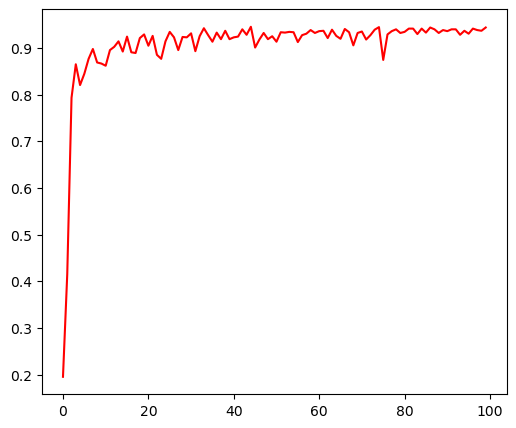

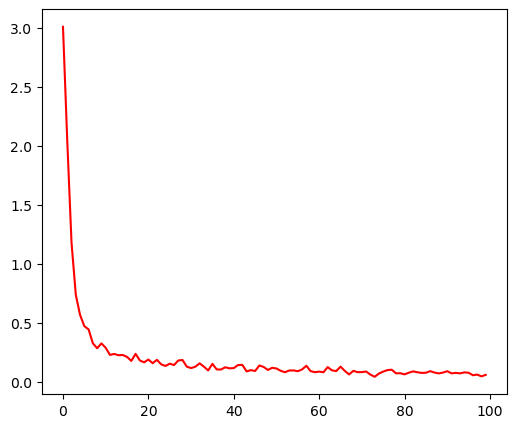

In [12]:
best_accuracy = 0
test1 = np.zeros(100)
loss1 = np.zeros(100)
train_size = 2989
test_size = 1281
for epoch in range(100):
    running_loss = 0.0
    train_acc = 0.0
    for step, (batch_image, batch_label) in enumerate(train_loader):
        model.train()
        batch_image, batch_label = batch_image, batch_label
        batch_output = model(batch_image)
        batch_loss = loss_func(batch_output, batch_label)

        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        running_loss += batch_loss.item()

        # train accuracy
        _, train_predicted = torch.max(batch_output.data, 1)
        train_acc += (train_predicted == batch_label).sum().item()

    train_acc /= train_size
    running_loss /= (step+1)

    # ----------test----------
    model.eval()
    test_acc = 0.0
    for test_image, test_label in test_loader:
        test_image, test_label = test_image, test_label
        test_output = model(test_image)
        _, predicted = torch.max(test_output.data, 1)
        test_acc += (predicted == test_label).sum().item()
    test_acc /= test_size

    print('epoch={:d}\ttrain loss={:.6f}\ttrain accuracy={:.3f}\ttest accuracy={:.3f}'.format(
        epoch, running_loss, train_acc, test_acc))
    test1[epoch] = test_acc
    loss1[epoch] = running_loss

    if test_acc >= best_accuracy:
        torch.save(model.state_dict(), './CNN_model.pkl')
        best_accuracy = test_acc
plt.figure(figsize=(6, 5))
plt.plot(test1,'red')
plt.figure(figsize=(6, 5))
plt.plot(loss1,'red')